In [49]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from scipy import stats


In [50]:
# установка стиля
sns.set(style ="whitegrid")

Загрузите датасет в pandas DataFrame под названием df.

In [51]:
# загрузка данных
file_path = "train.csv"
df = pd.read_csv('train.csv')

In [52]:
# вывод датасета

df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [53]:
df.isna().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

Определите, в каких столбцах есть отсутствующие значения

In [54]:
# обработка отсутств значений
numeric_cols = df.select_dtypes(include=[np.number])
df[numeric_cols.columns] = numeric_cols.fillna(numeric_cols.mean())
df[numeric_cols.columns]
df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,22.024023,9981.264932,1.382997,1.112799,30.202904,20.645407,180.569112,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,60.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,70.049958,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,79.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,164.250000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [55]:
# Выявление дубликатов
df.duplicated().sum()

np.int64(0)

In [69]:
df.SalePrice.min(), df.SalePrice.max()

(np.int64(34900), np.int64(755000))

Каково распределение целевой переменной 'SalePrice'? 

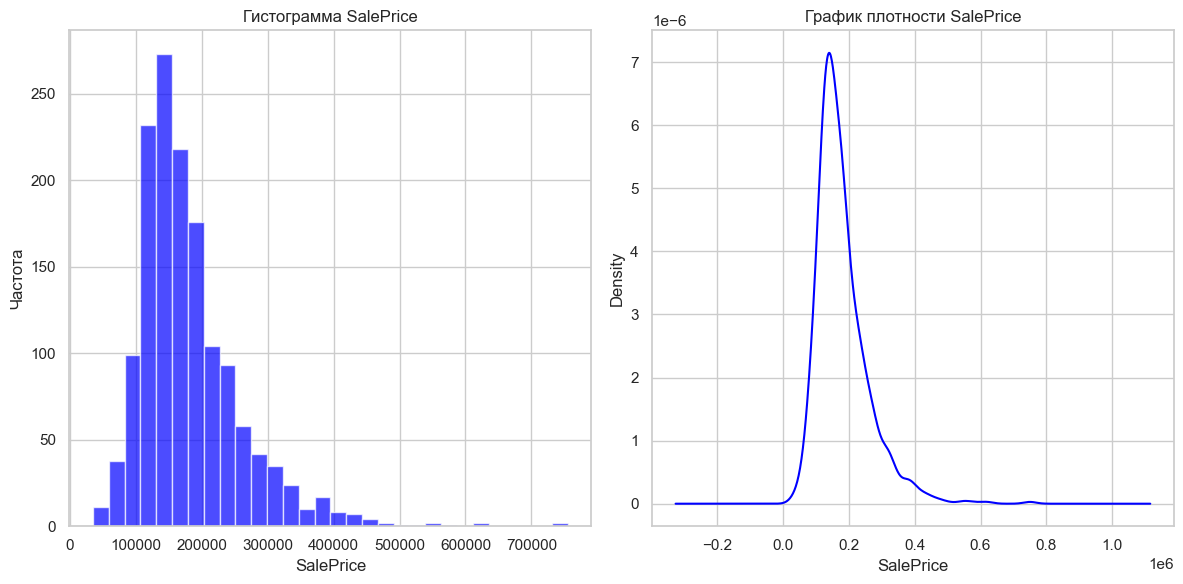

In [56]:
plt.figure(figsize=(12, 6))

# Гистограмма
plt.subplot(1, 2, 1)
plt.hist(df['SalePrice'], bins=30, color='blue', alpha=0.7)
plt.title('Гистограмма SalePrice')
plt.xlabel('SalePrice')
plt.ylabel('Частота')

# График плотности
plt.subplot(1, 2, 2)
df['SalePrice'].plot(kind='density', color='blue')
plt.title('График плотности SalePrice')
plt.xlabel('SalePrice')

plt.tight_layout()
plt.show()

 Исследуйте взаимосвязи между целевой переменной и другими характеристиками. Есть ли сильные корреляции?


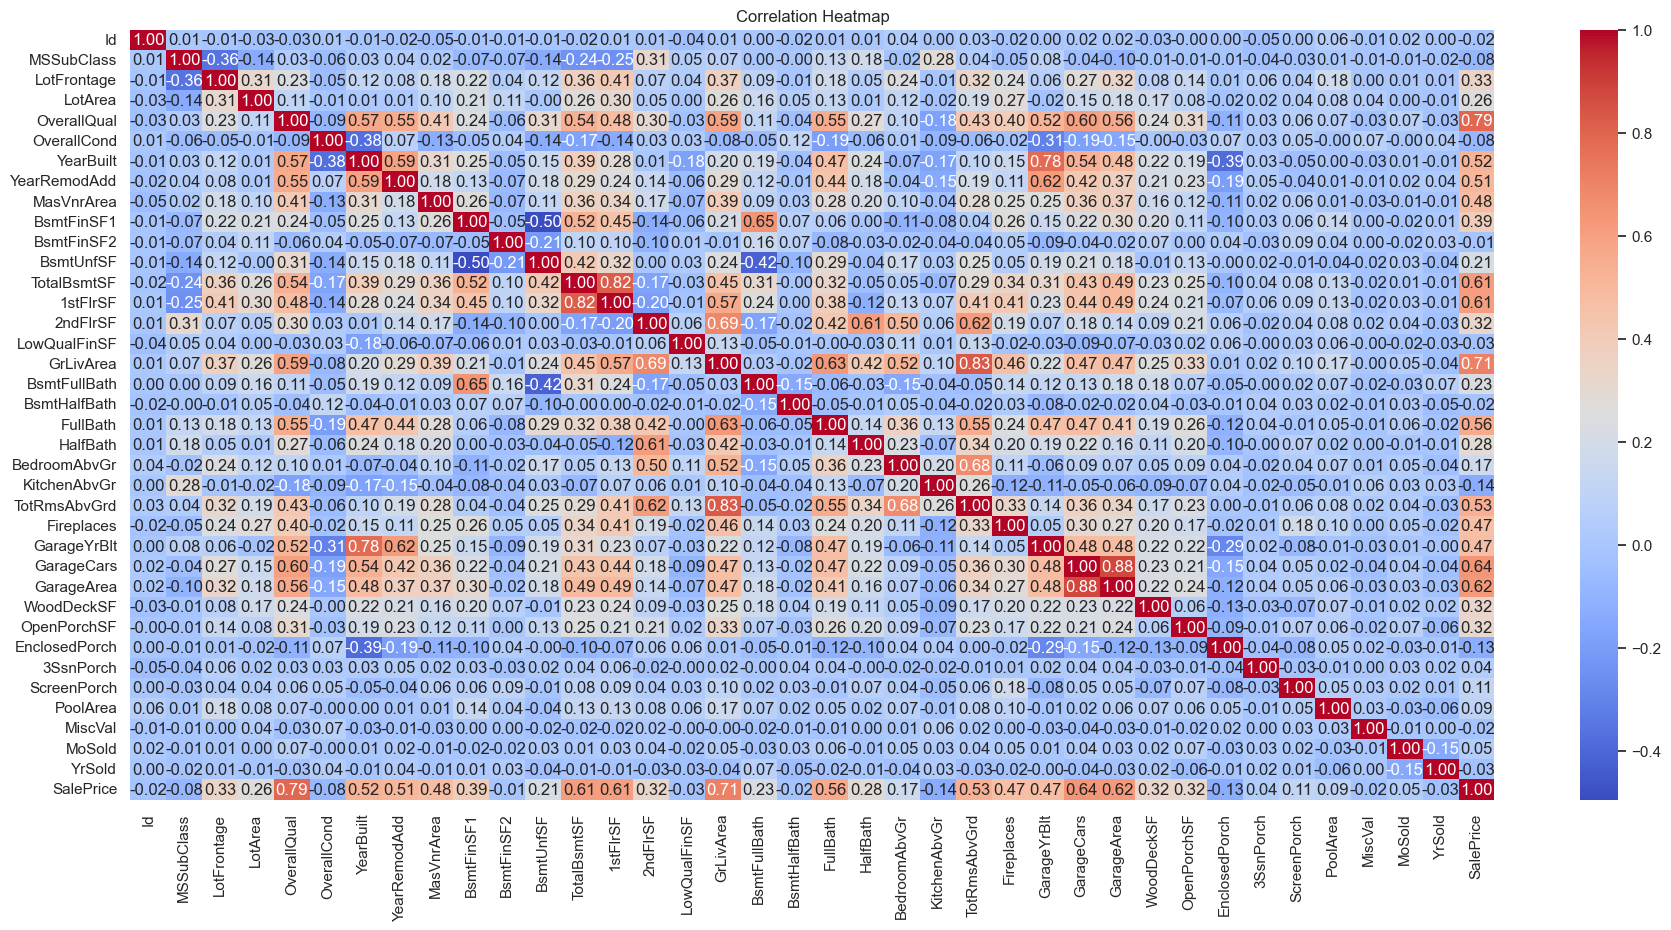

In [61]:
# Анализ корреляции между числовыми переменными в датафрейме
numerical_cols = df.select_dtypes(include=['number']).columns
numerical_df = df[numerical_cols]

# Calculate the correlation matrix
correlation_matrix = numerical_df.corr()

# Plot the heatmap
plt.figure(figsize=(22, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

Исследуйте распределение и взаимосвязи других важных характеристик, таких как 'OverallQual', 'GrLivArea', 'GarageCars'

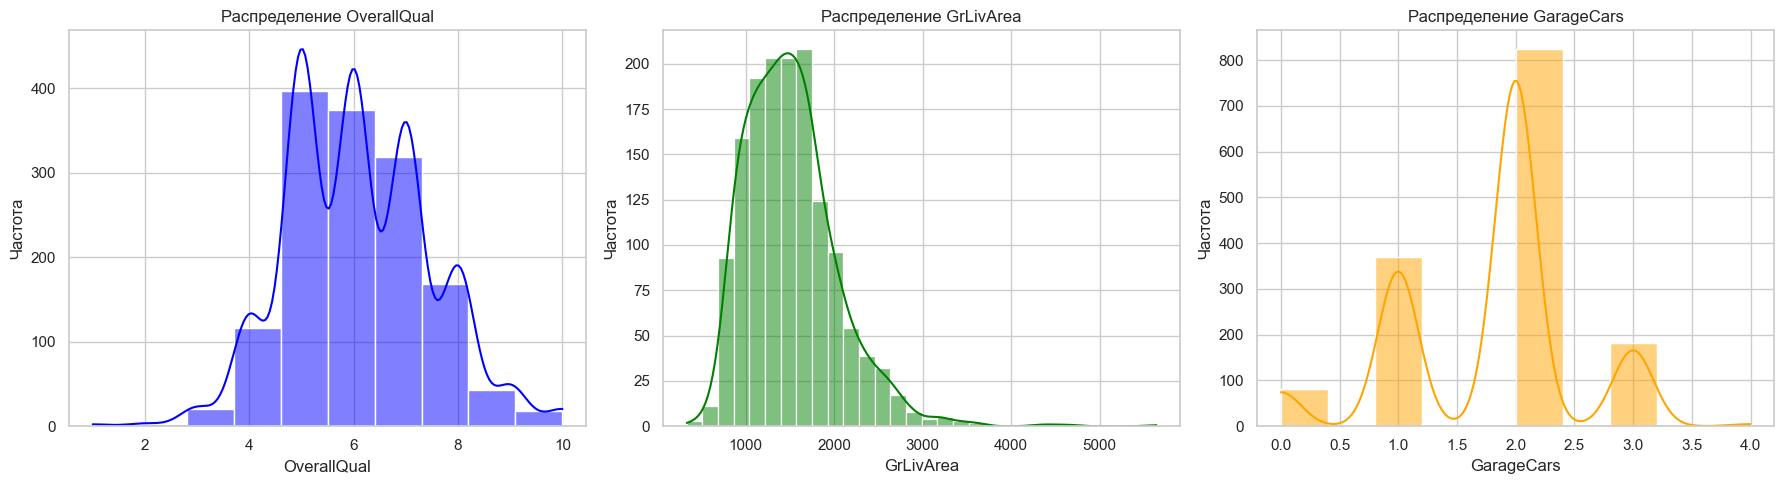

In [62]:
plt.figure(figsize=(18, 5))

# Гистограмма для OverallQual
plt.subplot(1, 3, 1)
sns.histplot(df['OverallQual'], bins=10, kde=True, color='blue')
plt.title('Распределение OverallQual')
plt.xlabel('OverallQual')
plt.ylabel('Частота')

# Гистограмма для GrLivArea
plt.subplot(1, 3, 2)
sns.histplot(df['GrLivArea'], bins=30, kde=True, color='green')
plt.title('Распределение GrLivArea')
plt.xlabel('GrLivArea')
plt.ylabel('Частота')

# Гистограмма для GarageCars
plt.subplot(1, 3, 3)
sns.histplot(df['GarageCars'], bins=10, kde=True, color='orange')
plt.title('Распределение GarageCars')
plt.xlabel('GarageCars')
plt.ylabel('Частота')

plt.tight_layout()
plt.show()

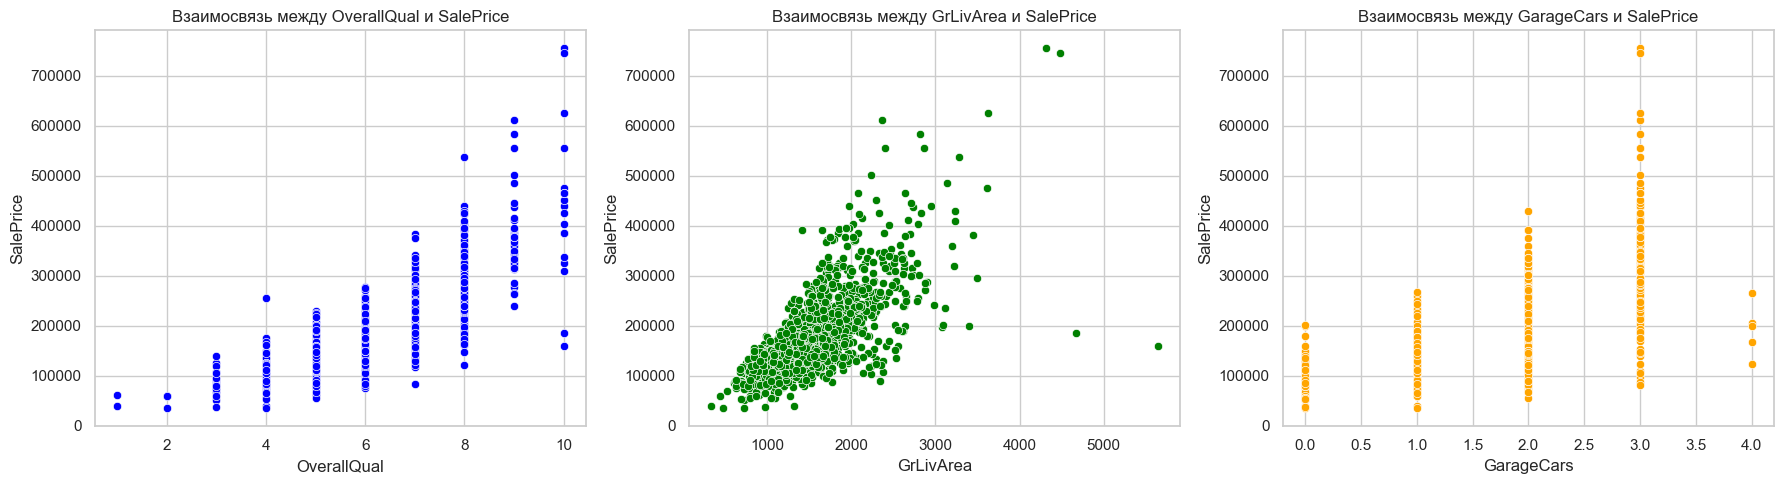

In [63]:
plt.figure(figsize=(18, 5))

# График рассеяния для OverallQual
plt.subplot(1, 3, 1)
sns.scatterplot(x='OverallQual', y='SalePrice', data=df, color='blue')
plt.title('Взаимосвязь между OverallQual и SalePrice')
plt.xlabel('OverallQual')
plt.ylabel('SalePrice')

# График рассеяния для GrLivArea
plt.subplot(1, 3, 2)
sns.scatterplot(x='GrLivArea', y='SalePrice', data=df, color='green')
plt.title('Взаимосвязь между GrLivArea и SalePrice')
plt.xlabel('GrLivArea')
plt.ylabel('SalePrice')

# График рассеяния для GarageCars
plt.subplot(1, 3, 3)
sns.scatterplot(x='GarageCars', y='SalePrice', data=df, color='orange')
plt.title('Взаимосвязь между GarageCars и SalePrice')
plt.xlabel('GarageCars')
plt.ylabel('SalePrice')

plt.tight_layout()
plt.show()

При необходимости создайте новые характеристики, такие как общая площадь или возраст объекта недвижимости, путем объединения существующих характеристик

In [68]:
df['TotalArea'] = df['GrLivArea'] + df['TotalBsmtSF'] + df['GarageArea']
df['Age'] = df['YrSold'] - df['YearBuilt']
df.head()


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,TotalArea,Age
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,NaN,NaN,0,2,2008,WD,Normal,208500,3114,5
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,NaN,NaN,0,5,2007,WD,Normal,181500,2984,31
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,NaN,NaN,0,9,2008,WD,Normal,223500,3314,7
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,NaN,NaN,0,2,2006,WD,Abnorml,140000,3115,91
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,NaN,NaN,0,12,2008,WD,Normal,250000,4179,8


In [ ]:
price = df[(df['Company'] == 'MSI') & (df['Gpu'] == 'Nvidia GeForce GTX 1050 Ti') & (df['Inches'] != 15.6)]

price.Price_euros.min(), price.Price_euros.max()

SalePrice — цена продажи недвижимости в долларах. Это целевая переменная, которую вы пытаетесь предсказать.
MSSubClass : класс здания
MSZoning : Общая классификация зонирования
LotFrontage : Линейные футы улицы, примыкающей к участку
LotArea : Размер участка в квадратных футах
Улица : Тип подъездной дороги
Аллея : Тип доступа к аллее
LotShape : Общая форма собственности
LandContour : Ровность участка
Коммунальные услуги : Тип доступных коммунальных услуг
LotConfig : Конфигурация лота
LandSlope : Уклон участка
Район : Физические местоположения в пределах города Эймс
Условие 1 : Близость к главной дороге или железной дороге
Условие 2 : Близость к главной дороге или железной дороге (если есть вторая)
BldgType : Тип жилья
HouseStyle : Стиль жилища
OverallQual : Общее качество материалов и отделки
OverallCond : Общая оценка состояния
Год постройки : Первоначальная дата постройки
YearRemodAdd : Дата реконструкции
RoofStyle : Тип крыши
RoofMatl : Кровельный материал
Exterior1st : Внешняя отделка дома
Exterior2nd : Внешняя отделка дома (если использовано более одного материала)
MasVnrType : Тип облицовки каменной кладкой
MasVnrArea : Площадь облицовки каменной кладкой в ​​квадратных футах
ExterQual : Качество внешнего материала
ExterCond : Текущее состояние материала снаружи
Фундамент : Тип фундамента
BsmtQual : Высота подвала
BsmtCond : Общее состояние подвала
BsmtExposure : Стены подвала на уровне выхода или сада
BsmtFinType1 : Качество отделки подвала
BsmtFinSF1 : Тип 1 готовые квадратные футы
BsmtFinType2 : Качество второй обработанной области (если присутствует)
BsmtFinSF2 : Тип 2, готовые квадратные футы
BsmtUnfSF : Неотделанные квадратные футы площади подвала
TotalBsmtSF : Общая площадь подвала в квадратных футах
Отопление : Тип отопления
HeatingQC : Качество и состояние отопления
CentralAir : Центральное кондиционирование воздуха
Электрика : Электрическая система
1stFlrSF : Первый этаж, кв. футы
2ndFlrSF : Второй этаж, кв. футы
LowQualFinSF : Низкое качество отделки квадратных футов (все этажи)
GrLivArea : жилая площадь над уровнем земли (квадратные футы)
BsmtFullBath : Ванные комнаты в подвале
BsmtHalfBath : Подвальные ванные комнаты
FullBath : Полноценные ванные комнаты выше уровня земли
HalfBath : Половина ванны выше уровня земли
Спальня : Количество спален выше цокольного этажа
Кухня : Количество кухонь
KitchenQual : Качество кухни
TotRmsAbvGrd : Общее количество комнат выше уровня земли (без учета ванных комнат)
Функциональность : Оценка функциональности дома
Камины : Количество каминов
FireplaceQu : Качество камина
GarageType : Расположение гаража
GarageYrBlt : Год постройки гаража
GarageFinish : Внутренняя отделка гаража
GarageCars : Размер гаража в единицах вместимости автомобиля
GarageArea : Площадь гаража в квадратных футах
GarageQual : Качество гаража
GarageCond : Состояние гаража
PavedDrive : Асфальтированная подъездная дорога
WoodDeckSF : Площадь деревянной террасы в квадратных футах
OpenPorchSF : Площадь открытого крыльца в квадратных футах
EnclosedPorch : Площадь закрытого крыльца в квадратных футах
3SsnPorch : Площадь веранды, рассчитанная на три сезона, в квадратных футах
ScreenPorch : Площадь веранды в квадратных футах
PoolArea : Площадь бассейна в квадратных футах
PoolQC : Качество пула
Забор : Качество забора
MiscFeature : Разные функции, не охваченные другими категориями.
MiscVal : $Value разного признака
MoSold : Месяц продажи
YrSold : Год продажи
SaleType : Тип продажи
Состояние продажи : Состояние продажи

Сохраните очищенный и преобразованный набор данных

In [70]:
output_file_path = 'cleaned_house_prices.csv'
df.to_csv('cleaned_house_prices.csv', index=False)